In [52]:
import csv
import matplotlib as plt

In [36]:
import pandas as pd
import numpy as np

In [11]:
import csv
import builtins  # Import to access the real open() function

dates = []
close_prices = []
open_prices = []  # Safe: uses plural form
highs = []
lows = []
volumes = []
change_pcts = []


with builtins.open('FPT_stock.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    
    for row in reader:
        # Append data to arrays
        dates.append(row[0])
        close_prices.append(float(row[1].replace(',', '')))  # "Lần cuối"
        open_prices.append(float(row[2].replace(',', '')))   # "Mở"
        highs.append(float(row[3].replace(',', '')))         # "Cao"
        lows.append(float(row[4].replace(',', '')))          # "Thấp"
        
        # Handle volume conversion
        vol_str = row[5].strip()
        if 'M' in vol_str:
            volumes.append(float(vol_str.replace('M', '')) * 1_000_000)
        elif 'K' in vol_str:
            volumes.append(float(vol_str.replace('K', '')) * 1_000)
        else:
            volumes.append(float(vol_str))
        
        # Handle percentage
        change_pcts.append(float(row[6].replace('%', '').strip()))


close_prices.reverse()
dates.reverse()
for i in range(len(close_prices)):
    close_prices[i] = close_prices[i] / 1000



print("First 3 dates:", dates[:3])
print("First 3 close prices:", close_prices[:3])



First 3 dates: ['04/01/2021', '05/01/2021', '06/01/2021']
First 3 close prices: [26.6327, 27.7387, 27.605900000000002]


In [16]:
def calculate_ema(close_prices):
    k1 = 2 / 12
    ema_values = []
    
    # Initialize with first price
    ema_values.append(25.562)
    
    # Build EMA incrementally with available data
    for i in range(1, len(close_prices)):
        # Calculate smoothing weight based on available data points
        
        current_ema = close_prices[i] * k + ema_values[-1] * (1 - k)
        ema_values.append(current_ema)
    
    return ema_values




In [17]:
ema_12 = calculate_ema(close_prices, 12)
ema_26 = calculate_ema(close_prices, 26)

# Calculate MACD line = EMA12 - EMA26
macd_line = [e12 - e26 for e12, e26 in zip(ema_12, ema_26)]


for x in macd_line:
    print(x)

0.0
0.1736398860398829
0.29710999748378697
0.3939938739998503
0.49364142541272216
0.6154981517286409
0.7427728159165703
0.8587301987884111
0.9362599979183308
0.9933929174882863
1.0162487044164479
0.870824050819806
0.7928403586763402
0.8038748977813022
0.8492441247406788
0.8786377455807504
0.8563628018448384
0.7232782983270205
0.45548299445035667
0.3851797450375827
0.3539406778903924
0.4136600335113627
0.5968993003538756
0.8218884775056594
1.0029154570119765
1.0768458203629407
1.2389639589386263
1.46831960643879
1.6418669700763715
1.7026637140080751
1.7379447673561899
1.6999040568185961
1.6472020293966239
1.6153710731042352
1.5720235025263918
1.5801435141531357
1.568498013129613
1.5344395947991636
1.4267466505824373
1.3261126156481637
1.228621988669481
1.110007714100206
1.0503035649180106
1.0056771965853102
0.9521929798393529
0.8994381891712706
1.006666336776938
1.072145183627235
1.1182879247933926
1.0993446259942985
1.0331577722230065
0.9730540232885332
0.8513527496414284
0.73218904237

In [20]:
import ta
import yfinance as yf

In [47]:
fpt = yf.download('FPT.VN', start='2021-01-01')

fpt.tail(10)

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_22767/1116123087.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fpt = yf.download('FPT.VN', start='2021-01-01')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FPT.VN,FPT.VN,FPT.VN,FPT.VN,FPT.VN
Date,,,,,
2025-07-11,110086.953125,111304.351562,108347.828125,108695.648438,12676173
2025-07-14,110521.742188,111217.390625,108695.648438,110608.695312,8923096
2025-07-15,109565.218750,111130.437500,109565.218750,110086.953125,6550566
2025-07-16,109826.085938,110434.781250,108782.609375,110173.914062,5838606
2025-07-17,110434.781250,112260.867188,109565.218750,110173.914062,10387301
2025-07-18,109565.218750,111304.351562,109565.218750,111304.351562,8065531
2025-07-21,110300.000000,112400.000000,110300.000000,112400.000000,8815279
2025-07-22,112100.000000,112200.000000,108700.000000,110300.000000,7127237


In [59]:
# Ensure 'Close' is a 1D Series
close_series = fpt['Close'].squeeze()

macd_object = ta.trend.MACD(close_series)
fpt['MACD'] = macd_object.macd()
fpt['MACD_Signal'] = macd_object.macd_signal()
fpt['MACD_Diff'] = macd_object.macd_diff()
fpt.tail()

Price,Close,High,Low,Open,Volume,MACD,MACD_Signal,MACD_Diff
Ticker,FPT.VN,FPT.VN,FPT.VN,FPT.VN,FPT.VN,,,
Date,,,,,,,,
2025-07-18,109565.21875,111304.351562,109565.21875,111304.351562,8065531,2273.515301,1901.120207,372.395094
2025-07-21,110300.00000,112400.000000,110300.00000,112400.000000,8815279,2272.402668,1975.376700,297.025968
2025-07-22,112100.00000,112200.000000,108700.00000,110300.000000,7127237,2389.224364,2058.146232,331.078131
2025-07-23,111800.00000,112800.000000,111300.00000,112300.000000,4825624,2429.592081,2132.435402,297.156679
2025-07-24,111500.00000,112100.000000,111200.00000,112000.000000,1316300,2409.599928,2187.868307,221.731620


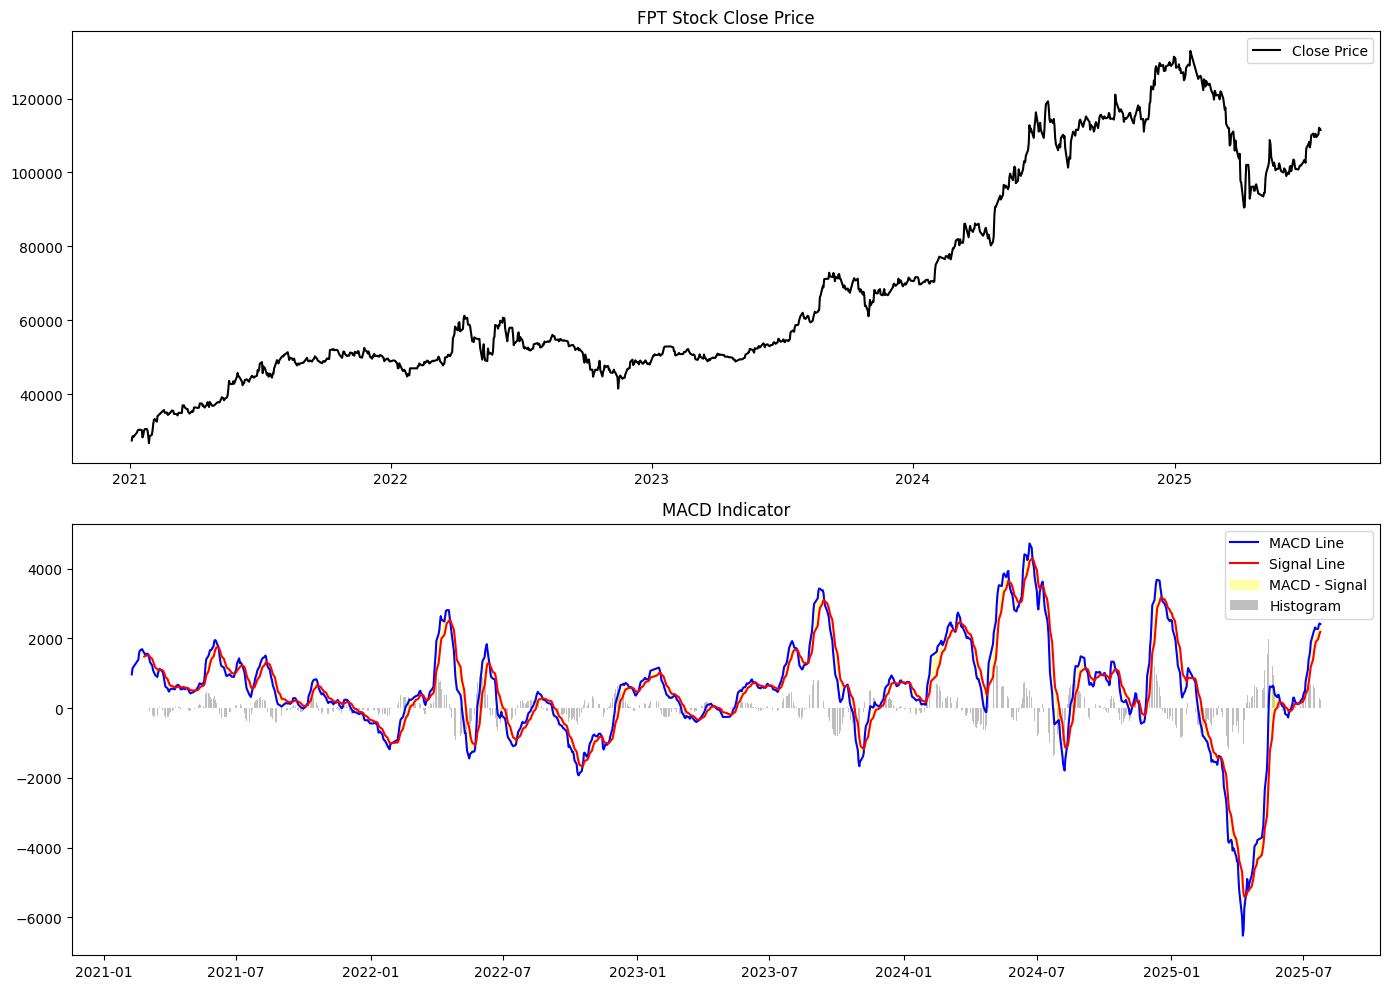

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# First graph: Close Price
plt.subplot(2,1,1)
plt.plot(fpt['Close'], label='Close Price', color='black')
plt.title('FPT Stock Close Price')
plt.legend()

# Second graph: MACD
plt.subplot(2,1,2)
plt.plot(fpt['MACD'], label='MACD Line', color='blue')
plt.plot(fpt['MACD_Signal'], label='Signal Line', color='red')
plt.bar(fpt.index, fpt['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
plt.fill_between(fpt.index, fpt['MACD'], fpt['MACD_Signal'], color='yellow', alpha=0.3, label='MACD - Signal')
plt.title('MACD Indicator')
plt.legend()

plt.tight_layout()
plt.show()

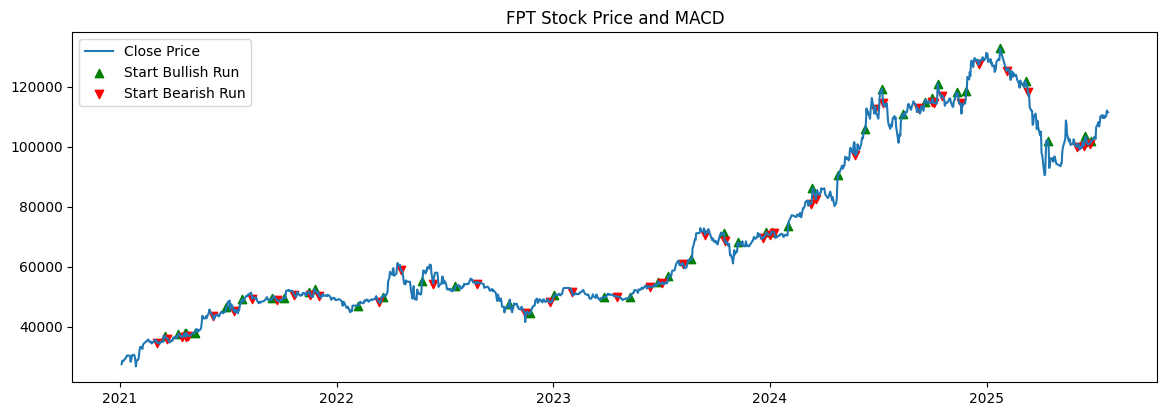

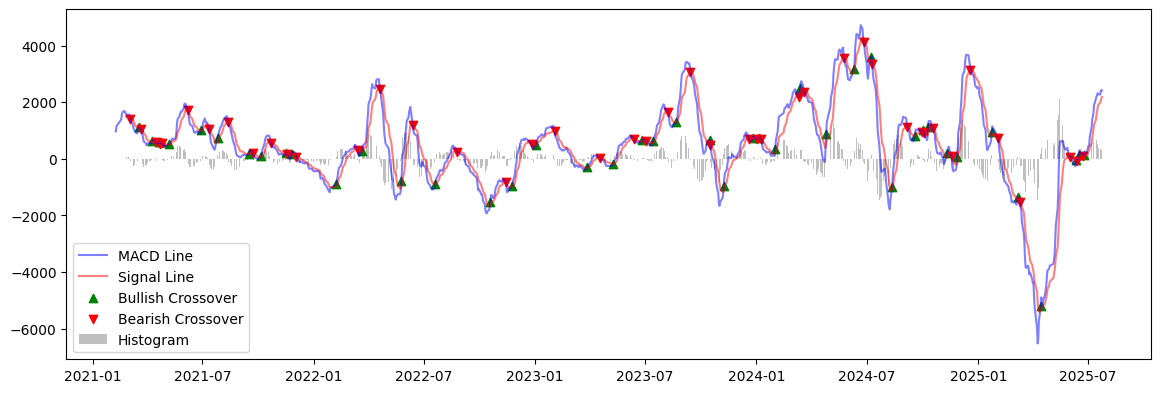

In [ ]:
# Identify starting points of bullish and bearish trends
fpt['Bullish_Run_Start'] = (fpt['MACD'] > fpt['MACD_Signal']) & (fpt['MACD'].shift(1) <= fpt['MACD_Signal'].shift(1))
fpt['Bearish_Run_Start'] = (fpt['MACD'] < fpt['MACD_Signal']) & (fpt['MACD'].shift(1) >= fpt['MACD_Signal'].shift(1))

# Plot
plt.figure(figsize=(14, 10))

#Plot Close Price
plt.subplot(2, 1, 1)
plt.plot(fpt['Close'], label='Close Price')
plt.scatter(fpt.index[fpt['Bullish_Run_Start']], fpt['Close'][fpt['Bullish_Run_Start']], marker='^', color='g', label='Start Bullish Run')
plt.scatter(fpt.index[fpt['Bearish_Run_Start']], fpt['Close'][fpt['Bearish_Run_Start']], marker='v', color='r', label='Start Bearish Run')
plt.title('FPT Stock Price and MACD')
plt.legend()


# Identify bullish and bearish crossover points
fpt['Bullish_Crossover'] = (fpt['MACD'] > fpt['MACD_Signal']) & (fpt['MACD'].shift(1) <= fpt['MACD_Signal'].shift(1))
fpt['Bearish_Crossover'] = (fpt['MACD'] < fpt['MACD_Signal']) & (fpt['MACD'].shift(1) >= fpt['MACD_Signal'].shift(1))

# Plot
plt.figure(figsize=(14, 10))

# Plot MACD
plt.subplot(2, 1, 2)
plt.plot(fpt['MACD'], label='MACD Line', color='blue', alpha=0.5)
plt.plot(fpt['MACD_Signal'], label='Signal Line', color='red', alpha=0.5)
plt.bar(fpt.index, fpt['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)

# Markers for bullish and bearish crossover
plt.scatter(fpt.index[fpt['Bullish_Crossover']], fpt['MACD'][fpt['Bullish_Crossover']], marker='^', color='g', label='Bullish Crossover')
plt.scatter(fpt.index[fpt['Bearish_Crossover']], fpt['MACD'][fpt['Bearish_Crossover']], marker='v', color='r', label='Bearish Crossover')

plt.legend()
plt.show()


In [ ]:

bullish_dates = fpt.index[fpt['Bullish_Run_Start']].tolist()
bearish_dates = fpt.index[fpt['Bearish_Run_Start']].tolist()


print("Bullish run start dates:", bullish_dates)
print("Bearish run start dates:", bearish_dates)

44
Bullish run start dates: [Timestamp('2021-03-18 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-20 00:00:00'), Timestamp('2021-04-23 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-06-29 00:00:00'), Timestamp('2021-07-26 00:00:00'), Timestamp('2021-09-15 00:00:00'), Timestamp('2021-10-05 00:00:00'), Timestamp('2021-11-16 00:00:00'), Timestamp('2021-11-25 00:00:00'), Timestamp('2022-02-07 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-05-25 00:00:00'), Timestamp('2022-07-20 00:00:00'), Timestamp('2022-10-19 00:00:00'), Timestamp('2022-11-23 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-03-28 00:00:00'), Timestamp('2023-05-10 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-07-14 00:00:00'), Timestamp('2023-08-22 00:00:00'), Timestamp('2023-10-16 00:00:00'), Timestamp('2023-11-08 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-

In [ ]:
for date in bullish_dates:
    print(f"Date: {date}, Close Price: {fpt.loc[date, 'Close']}")



Date: 2021-03-18 00:00:00, Close Price: Ticker
FPT.VN    36995.675781
Name: 2021-03-18 00:00:00, dtype: object
Date: 2021-04-09 00:00:00, Close Price: Ticker
FPT.VN    37498.089844
Name: 2021-04-09 00:00:00, dtype: object
Date: 2021-04-20 00:00:00, Close Price: Ticker
FPT.VN    37863.484375
Name: 2021-04-20 00:00:00, dtype: object
Date: 2021-04-23 00:00:00, Close Price: Ticker
FPT.VN    37909.15625
Name: 2021-04-23 00:00:00, dtype: object
Date: 2021-05-07 00:00:00, Close Price: Ticker
FPT.VN    37909.15625
Name: 2021-05-07 00:00:00, dtype: object
Date: 2021-06-29 00:00:00, Close Price: Ticker
FPT.VN    46536.910156
Name: 2021-06-29 00:00:00, dtype: object
Date: 2021-07-26 00:00:00, Close Price: Ticker
FPT.VN    49215.671875
Name: 2021-07-26 00:00:00, dtype: object
Date: 2021-09-15 00:00:00, Close Price: Ticker
FPT.VN    49425.773438
Name: 2021-09-15 00:00:00, dtype: object
Date: 2021-10-05 00:00:00, Close Price: Ticker
FPT.VN    49583.34375
Name: 2021-10-05 00:00:00, dtype: object
Date

In [69]:
bullish_dict = {str(date): fpt.loc[date, 'Close'] for date in bullish_dates}
print("Bullish run start date and close price dictionary:", bullish_dict)

for date, price in bullish_dict.items():
    print(f"Date: {date}, Close Price: {price}")

Bullish run start date and close price dictionary: {'2021-03-18 00:00:00': Ticker
FPT.VN    36995.675781
Name: 2021-03-18 00:00:00, dtype: object, '2021-04-09 00:00:00': Ticker
FPT.VN    37498.089844
Name: 2021-04-09 00:00:00, dtype: object, '2021-04-20 00:00:00': Ticker
FPT.VN    37863.484375
Name: 2021-04-20 00:00:00, dtype: object, '2021-04-23 00:00:00': Ticker
FPT.VN    37909.15625
Name: 2021-04-23 00:00:00, dtype: object, '2021-05-07 00:00:00': Ticker
FPT.VN    37909.15625
Name: 2021-05-07 00:00:00, dtype: object, '2021-06-29 00:00:00': Ticker
FPT.VN    46536.910156
Name: 2021-06-29 00:00:00, dtype: object, '2021-07-26 00:00:00': Ticker
FPT.VN    49215.671875
Name: 2021-07-26 00:00:00, dtype: object, '2021-09-15 00:00:00': Ticker
FPT.VN    49425.773438
Name: 2021-09-15 00:00:00, dtype: object, '2021-10-05 00:00:00': Ticker
FPT.VN    49583.34375
Name: 2021-10-05 00:00:00, dtype: object, '2021-11-16 00:00:00': Ticker
FPT.VN    51631.8125
Name: 2021-11-16 00:00:00, dtype: object, '20

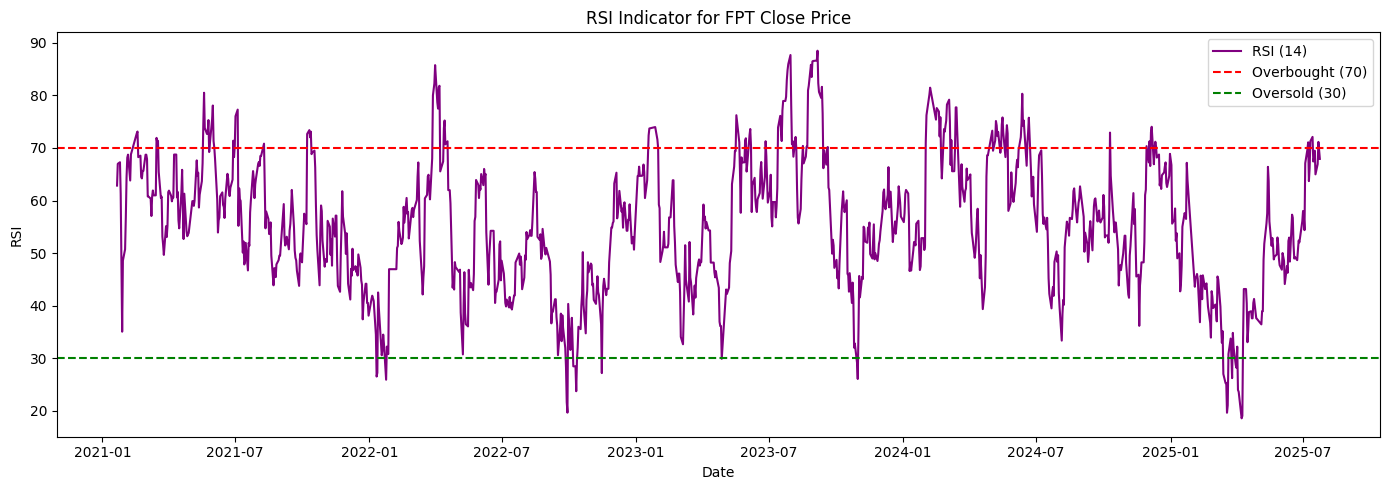

In [78]:
# First ensure you have the TA library installed
# !pip install ta  # Uncomment if needed

# Import required libraries
import pandas as pd
from ta.momentum import RSIIndicator  # Correct import path

# Assuming fpt is your DataFrame with 'Close' prices
close_array = fpt['Close'].values  # Better to use .values than .to_numpy()

# Calculate RSI
# Best approach - use the Series directly

# Convert to Series if needed (usually fpt['Close'] is already a Series)
close_series = fpt['Close'].squeeze() if isinstance(fpt['Close'], pd.DataFrame) else fpt['Close']
# Calculate RSI
fpt['RSI'] = RSIIndicator(close=close_series, window=14).rsi()


# Visualize RSI
plt.figure(figsize=(14,5))
plt.plot(fpt.index, fpt['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator for FPT Close Price')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
def get_rsi_for_dates(dates, rsi_series):
    """Return a dictionary mapping date string to RSI value for the given dates."""
    return {str(date): rsi_series.loc[date] for date in dates}

bullish_rsi = get_rsi_for_dates(bullish_dates, fpt['RSI'])
bearish_rsi = get_rsi_for_dates(bearish_dates, fpt['RSI'])

print("RSI for bullish run start dates:", bullish_rsi)
print("RSI for bearish run start dates:", bearish_rsi)

RSI for bullish run start dates: {'2021-03-18 00:00:00': np.float64(71.37353907208906), '2021-04-09 00:00:00': np.float64(68.74832927392993), '2021-04-20 00:00:00': np.float64(65.84341664247097), '2021-04-23 00:00:00': np.float64(61.30004774237082), '2021-05-07 00:00:00': np.float64(59.96156129368067), '2021-06-29 00:00:00': np.float64(71.38548214733225), '2021-07-26 00:00:00': np.float64(65.60211651687551), '2021-09-15 00:00:00': np.float64(55.56534960309824), '2021-10-05 00:00:00': np.float64(56.22476261400123), '2021-11-16 00:00:00': np.float64(57.13739255276891), '2021-11-25 00:00:00': np.float64(61.776567607524775), '2022-02-07 00:00:00': np.float64(46.9470559202401), '2022-03-21 00:00:00': np.float64(61.08149446858972), '2022-05-25 00:00:00': np.float64(56.12090221690473), '2022-07-20 00:00:00': np.float64(48.22249831052454), '2022-10-19 00:00:00': np.float64(42.263787834385084), '2022-11-23 00:00:00': np.float64(43.212877544865464), '2023-01-03 00:00:00': np.float64(64.674487587